In [28]:
import json
import requests
import pandas as pd

# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [52]:
data = requests.get("https://raw.githubusercontent.com/papercopilot/paperlists/main/nips/nips2023.json").json()
df = pd.DataFrame(data)
# df to csv file
df.to_csv('nips2023.csv', index=False)



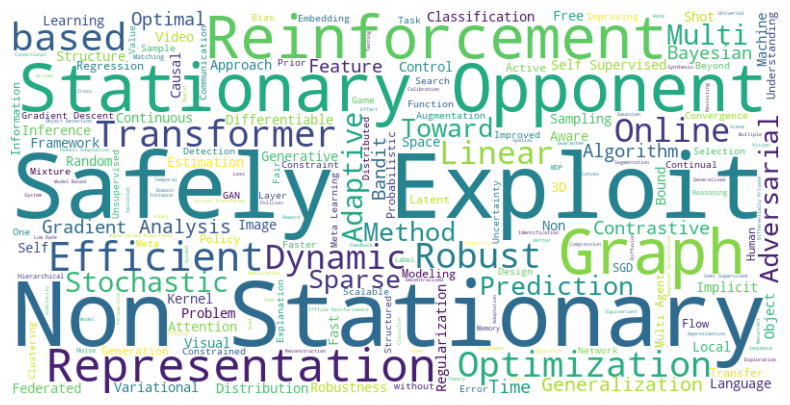

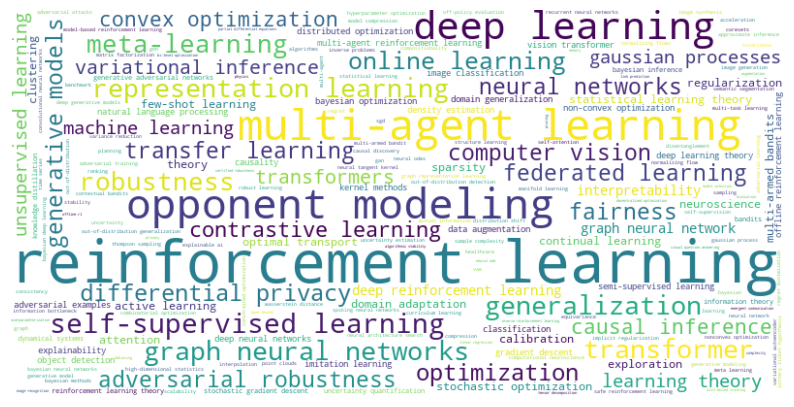

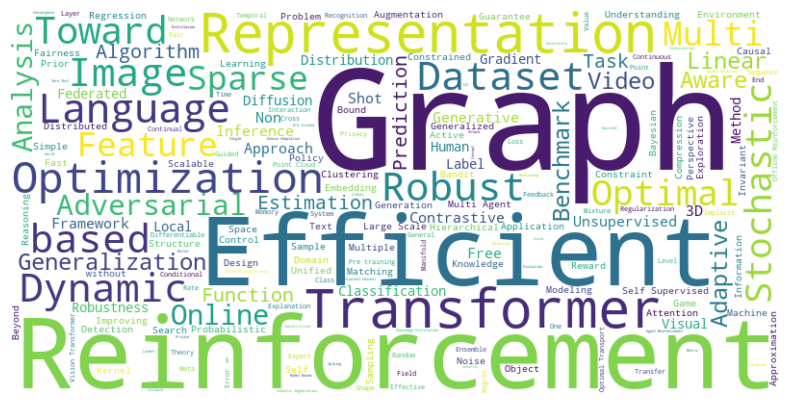

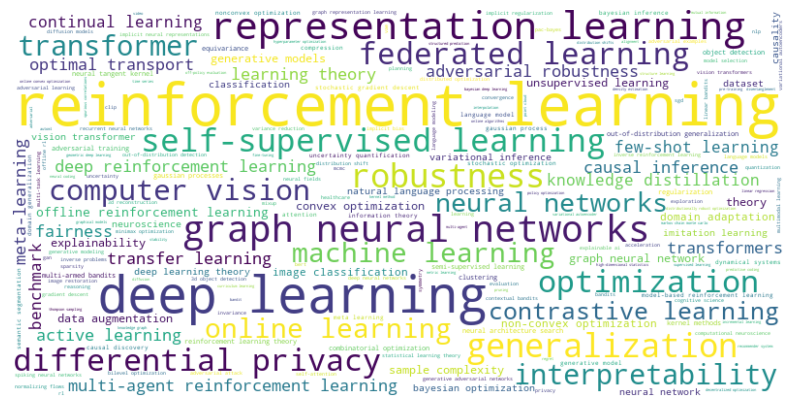

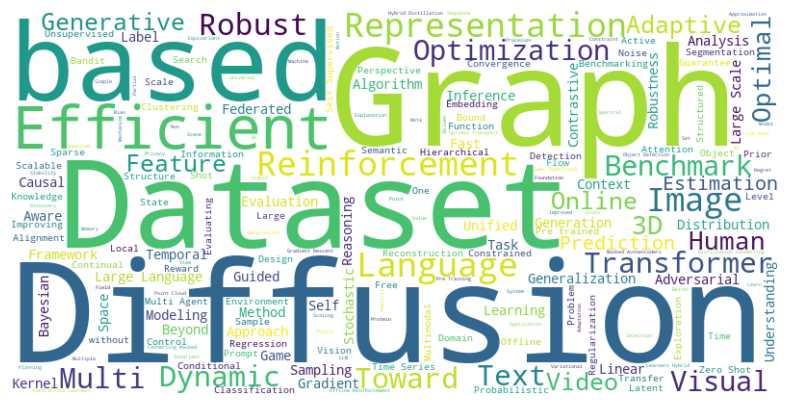

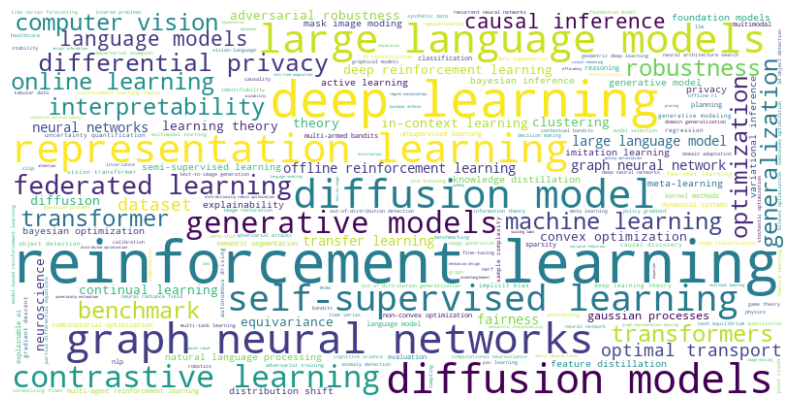

In [51]:
def show_wordcloud(url_json="https://raw.githubusercontent.com/papercopilot/paperlists/main/nips/nips2023.json"):
    data = requests.get(url_json).json()
    df = pd.DataFrame(data)
    text = " ".join(df['title'].values).strip()
    stopwords_deep_learning = ['learning', 'network', 'neural', 'networks', 'deep', 'via', 'using',
                                'training', 'algorithm', 
                                'convolutional', 'single', '-based', 'based', 'model', 'models', 'data']
    text = " ".join([word for word in text.split() if word.lower() not in stopwords_deep_learning])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f'./pdf/wordcloud_{url_json.split("/")[-1].replace(".json", ".pdf")}', bbox_inches='tight')
    plt.show()
    
    keywords = df['keywords'].tolist()
    # split the keywords into a list of keywords by "," and remove the leading and trailing whitespaces, and convert to lowercase
    keywords2 = [keyword.strip().lower().split(";") for keyword in keywords]
    all_keywords = [keyword for sublist in keywords2 for keyword in sublist]
    unique_keywords = list(set(all_keywords))
    # len(unique_keywords)
    # keywords and counts
    keyword_counts = {keyword: all_keywords.count(keyword) for keyword in unique_keywords}

    # display the wordcloud for top 50 keywords
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(keyword_counts)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    
    plt.savefig(f'./pdf/wordcloud_keywords_{url_json.split("/")[-1].replace(".json", ".pdf")}', bbox_inches='tight')
    plt.show()
    # plt
    return text, wordcloud
text, wordcloud = show_wordcloud("https://raw.githubusercontent.com/papercopilot/paperlists/main/nips/nips2021.json")
text, wordcloud = show_wordcloud("https://raw.githubusercontent.com/papercopilot/paperlists/main/nips/nips2022.json")
text, wordcloud = show_wordcloud("https://raw.githubusercontent.com/papercopilot/paperlists/main/nips/nips2023.json")


In [5]:
# put the data into a pandas dataframe
data_df = pd.DataFrame(data)
data_df

,id,title,track,status,keywords,author,rating,confidence,correctness,technical_novelty,...,corr_rating_confidence,corr_rating_correctness,site,proceeding,pdf,openreview,poster,slides,video,title_site
0,009LK0vLcY,Finite Population Regression Adjustment and No...,main,Poster,regression adjustment; treatment effect estima...,"Mehrdad Ghadiri, David Arbour, Tung Mai, Camer...",4;4;5;7,3;3;3;5,2;3;2;3,3;2;2;3,...,0.942809,0.408248,https://nips.cc/virtual/2023/poster/73081,https://proceedings.neurips.cc/paper_files/pap...,https://proceedings.neurips.cc/paper_files/pap...,https://openreview.net/forum?id=009LK0vLcY,,https://nips.cc/virtual/2023/poster/73081,https://nips.cc/virtual/2023/poster/73081,NaN
1,00EKYYu3fD,Complexity Matters: Rethinking the Latent Spac...,main,Spotlight,generative model;latent space;distance between...,"Tianyang Hu, Fei Chen, Haonan Wang, Jiawei Li,...",6;6;7;7,3;4;3;4,3;3;3;3,2;3;4;2,...,0.000000,0.000000,https://nips.cc/virtual/2023/poster/73080,https://proceedings.neurips.cc/paper_files/pap...,https://proceedings.neurips.cc/paper_files/pap...,https://openreview.net/forum?id=00EKYYu3fD,/media/PosterPDFs/NeurIPS%202023/73080.png?t=1...,https://nips.cc/virtual/2023/poster/73080,https://nips.cc/virtual/2023/poster/73080,NaN
2,01GQK1gwe3,Can Neural Networks Improve Classical Optimiza...,main,Reject,Inverse problems;neural networks;iterative opt...,,4;5;6;7,2;2;3;3,2;3;3;3,2;3;3;3,...,0.894427,0.774597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02Uc0G2Cym,Robustness Guarantees for Adversarially Traine...,main,Poster,Adversarial training;neural networks;robustnes...,"Poorya Mianjy, Raman Arora",6;6;6;7,4;4;4;3,3;3;2;3,3;3;3;3,...,-1.000000,0.333333,https://nips.cc/virtual/2023/poster/73079,https://proceedings.neurips.cc/paper_files/pap...,https://proceedings.neurips.cc/paper_files/pap...,https://openreview.net/forum?id=02Uc0G2Cym,,https://nips.cc/virtual/2023/poster/73079,https://nips.cc/virtual/2023/poster/73079,NaN
4,05P1U0jk8r,Exploiting hidden structures in non-convex gam...,main,Poster,Nash Equilibrium;Games;Gradient;Non-monotone V...,"Iosif Sakos, Emmanouil-Vasileios Vlatakis-Gkar...",5;5;6;7;7,3;4;2;3;4,3;2;3;3;3,4;3;3;4;4,...,0.000000,0.559017,https://nips.cc/virtual/2023/poster/73078,https://proceedings.neurips.cc/paper_files/pap...,https://proceedings.neurips.cc/paper_files/pap...,https://openreview.net/forum?id=05P1U0jk8r,/media/PosterPDFs/NeurIPS%202023/73078.png?t=1...,https://nips.cc/virtual/2023/poster/73078,https://nips.cc/virtual/2023/poster/73078,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,ztqf6bzuqQ,Hybrid Distillation: Connecting Masked Autoenc...,main,Reject,contrastive learning;mask image moding;feature...,,4;4;5;5;6,4;3;5;5;5,3;2;1;3;4,3;2;2;2;3,...,0.801784,0.419314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3752,ztqf6bzuqQ,Hybrid Distillation: Connecting Masked Autoenc...,main,Reject,contrastive learning;mask image moding;feature...,,4;4;5;5;6,4;3;5;5;5,3;2;1;3;4,3;2;2;2;3,...,0.801784,0.419314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3753,zuXyQsXVLF,Enhancing Adversarial Contrastive Learning via...,main,Poster,robust pre-training;adversarial contrastive le...,"Xilie Xu, Jingfeng ZHANG, Feng Liu, Masashi Su...",4;6;6;8,4;4;4;4,2;3;3;3,2;3;3;2,...,0.000000,0.816497,https://nips.cc/virtual/2023/poster/69867,https://proceedings.neurips.cc/paper_files/pap...,https://proceedings.neurips.cc/paper_files/pap...,https://openreview.net/forum?id=zuXyQsXVLF,/media/PosterPDFs/NeurIPS%202023/69867.png?t=1...,https://nips.cc/virtual/2023/poster/69867,https://nips.cc/virtual/2023/poster/69867,NaN
3754,zyZkaqNnpa,Don’t blame Dataset Shift! Shortcut Learning d...,main,Poster,shortcut learning;spurious correlations;perfec...,"Aahlad Manas Puli, Lily Zhang, Yoav Wald, Raje...",5;6;6;6,3;3;3;3,4;3;3;3,4;3;3;3,...,0.000000,-1.000000,https://nips.cc/virtual/2023/poster/69866,https://proceedings.neurips.cc/paper_files/pap...,https://proceedings.neurips.cc/paper_files/pap...,https://openr

In [14]:
keywords = data_df['keywords'].tolist()
# split the keywords into a list of keywords by "," and remove the leading and trailing whitespaces, and convert to lowercase
keywords2 = [keyword.strip().lower().split(";") for keyword in keywords]

In [16]:
# keywords2
all_keywords = [keyword for sublist in keywords2 for keyword in sublist]

In [19]:
all_keywords = [keyword for sublist in keywords2 for keyword in sublist]
unique_keywords = list(set(all_keywords))
# len(unique_keywords)
# keywords and counts
keyword_counts = {keyword: all_keywords.count(keyword) for keyword in unique_keywords}

# display the wordcloud for top 50 keywords
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(keyword_counts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



In [23]:
# keyword_counts
# top 10 keywords by count
sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)[:50]

[('reinforcement learning', 189),
 ('deep learning', 134),
 ('graph neural networks', 93),
 ('diffusion models', 89),
 ('diffusion model', 84),
 ('large language models', 83),
 ('representation learning', 82),
 ('self-supervised learning', 72),
 ('contrastive learning', 71),
 ('generative models', 65),
 ('federated learning', 65),
 ('differential privacy', 63),
 ('interpretability', 56),
 ('computer vision', 55),
 ('robustness', 53),
 ('transformers', 53),
 ('benchmark', 52),
 ('optimization', 51),
 ('machine learning', 51),
 ('generalization', 50),
 ('online learning', 48),
 ('transformer', 47),
 ('language models', 42),
 ('causal inference', 41),
 ('optimal transport', 40),
 ('dataset', 40),
 ('offline reinforcement learning', 39),
 ('large language model', 38),
 ('neural networks', 38),
 ('fairness', 36),
 ('graph neural network', 34),
 ('transfer learning', 33),
 ('deep reinforcement learning', 33),
 ('in-context learning', 31),
 ('continual learning', 31),
 ('neuroscience', 30),
 

In [27]:
len(keyword_counts)

7683

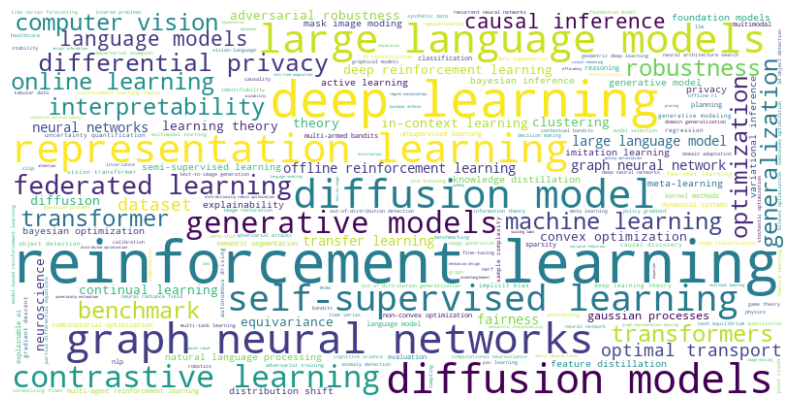

In [26]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# display the wordcloud for top 50 keywords
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(keyword_counts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [25]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.7/168.7 kB 972.2 kB/s eta 0:00:00a 0:00:01
